# CAPSTONE PROJECT (TEAM 1)
## HOUSE PRICE PREDICTION

## NISHANT KUMAR 
## THANUSHA DEVRAJULA
## MEGHA DEEPIKA
## HARSH KODALI
## VALI PRAVEEN
## SRINIVAS KALVA

In [1]:
# importing packages required for data manipulation and mathematical calculation
import pandas as pd     
import numpy as np

#importing packages for plottong graphs
import matplotlib.pyplot as plt
import seaborn as sns

#importing packages for splitting the data
from sklearn.model_selection import train_test_split

#importing different models for our dataset
from sklearn.linear_model import LassoCV,RidgeCV,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from vecstack import stacking

#importing packages for model evaluarion
from sklearn.metrics import mean_squared_error,r2_score
def mean_absolute_percentage_error(y_true,y_pred):
     return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.shape

(1460, 81)

In [4]:
data.isnull().sum().sort_values(ascending=False)/1460

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
                   ...   
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
3SsnPorch        0.000000
BsmtUnfSF        0.000000
ScreenPorch      0.000000
PoolArea    

In [5]:
# Here we are droping the column with more than 500 null values
drop=[]
for i in data.columns:
    if data[i].isnull().sum()>500:
        drop.append(i)
data.drop(drop,axis=1,inplace=True)

# Here we are separating the data into categorical and numerical
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=='O':
        cat.append(i)
    else:
        num.append(i)
data_cat=data.loc[:,cat]
data_num=data.loc[:,num]

#Here we are separating the categorical column into null and nut null 
null=[]
not_null=[]
for i in data_cat.columns:
    if data[i].isnull().sum()>0:
        null.append(i)
    else:
        not_null.append(i)

In [6]:
data_cat.loc[:,null].isnull().sum()

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [7]:
# As Electrical column has only 1 missing value so we are going for mode imputation
data_cat["Electrical"].fillna(data_cat["Electrical"].mode()[0],inplace=True)

# Example for imputing an categorical column

In [8]:
data["GarageType"].isnull().sum()

81

In [9]:
data["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [10]:
data["GarageType"][data["GarageType"].isnull()].head()

39    NaN
48    NaN
78    NaN
88    NaN
89    NaN
Name: GarageType, dtype: object

In [11]:
x=pd.get_dummies(data["GarageType"])
x.iloc[[39,48,78,88,89],:]

,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
39,0,0,0,0,0,0
48,0,0,0,0,0,0
78,0,0,0,0,0,0
88,0,0,0,0,0,0
89,0,0,0,0,0,0


# Treating null columns

In [12]:
# here we are taking dummy variable for all null columns
data_null=pd.get_dummies(data_cat.loc[:,null]) 

#here we are taking dummy for rest of the column and droping the first column
data_not_null=pd.get_dummies(data_cat.loc[:,not_null],drop_first=True)

#Here we are concating the null and not null categorical data to one data
data_cat_new=pd.concat([data_not_null,data_null],axis=1)

#Here we are imputing 0 to rest of the numerical variable
data_num["GarageYrBlt"].fillna(0,inplace=True)
data_num["MasVnrArea"].fillna(0,inplace=True)
data_num["LotFrontage"].fillna(0,inplace=True)

#Here we are concating the numerical data with categorical data 
data_new=pd.concat([data_num,data_cat_new],axis=1)
print("Shape of the final data",data_new.shape)
print("No of null values in final data: ",data_new.isnull().sum().sum())

Shape of the final data (1460, 245)
No of null values in final data:  0


# Feature Engineering on some columns

In [13]:
#Here we are adding two floor square feet to new one 
data_new["Total_Sqft"]=data_new["1stFlrSF"]+data["2ndFlrSF"]

#After combining we dont require 1st floor SF and 2nd floor SF
data_new.drop(["1stFlrSF","2ndFlrSF"],inplace=True,axis=1)

#Here we are adding two type of bathrooms two one
data_new["TotalBathroom"]=data_new["FullBath"]+0.5*data_new["HalfBath"]

#Here we are adding two types of basement bathrooms to one
data_new["TotalBasementBathroom"]=data_new["BsmtFullBath"]+0.5*data_new["BsmtHalfBath"]

#Here we are adding two kind of basement bathrooms to one
data_new.drop(["FullBath","HalfBath","BsmtFullBath","BsmtHalfBath"],axis=1,inplace=True)

#Here we are droping the two columns due to multicollinearity
data_new.drop(["YearBuilt","GrLivArea"],inplace=True,axis=1)

In [14]:
data=data_new
data.shape

(1460, 240)

# splitting the data into two parts

In [15]:
x=data.drop(['Id','SalePrice'],axis=1)
y=data["SalePrice"]
y_log=np.log(data["SalePrice"])   # Here sales price we have taken as log
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1234)
x_train,x_test,y_train_log,y_test_log=train_test_split(x,y_log,test_size=0.3,random_state=1234)

# Calling different models

In [16]:
model_lasso=LassoCV(cv=5,random_state=1234)
model_ridge=RidgeCV(cv=5,alphas=[0.1,1,2,3,4,5,6,7,8,9,10])
model_linear=LinearRegression()
RMSE=[]
R_square=[]
MAPE=[]
MODELS=[]

# Lasso Regression

## Case 1

In [17]:
MODELS.append("Lasso Regression")
model_lasso.fit(x_train,y_train)
pred_lasso=model_lasso.predict(x_test)
print("No of variables: ",sum(model_lasso.coef_!=0))
predictors=x_train.columns
coef=pd.Series(model_lasso.coef_,predictors).sort_values()
print("  Case1- Sales Price as not log")
print()
print(coef[coef.values!=0])
print()
print("No of variables: ",sum(model_lasso.coef_!=0))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,pred_lasso)))
print("MAPE: ",mean_absolute_percentage_error(y_test,pred_lasso))
print("R-Squared: ",r2_score(y_test,pred_lasso))
RMSE.append(np.sqrt(mean_squared_error(y_test,pred_lasso)))
MAPE.append(mean_absolute_percentage_error(y_test,pred_lasso))
R_square.append(r2_score(y_test,pred_lasso))

No of variables:  12
  Case1- Sales Price as not log

EnclosedPorch    -22.872047
GarageYrBlt       -1.981877
MiscVal           -0.111902
LotArea            0.028427
ScreenPorch        0.622495
BsmtFinSF1        11.972605
TotalBsmtSF       31.718728
WoodDeckSF        39.109283
MasVnrArea        50.451574
Total_Sqft        64.924976
GarageArea        80.829675
YearRemodAdd     273.548959
dtype: float64

No of variables:  12
RMSE:  35316.35617866007
MAPE:  14.271334675079963
R-Squared:  0.7504508248615199


## Case 2 as log(sales price)

In [18]:
model_lasso_log=LassoCV(cv=5)
model_lasso_log.fit(x_train,y_train_log)
pred_lasso_log=model_lasso_log.predict(x_test)
predictors=x_train.columns
coef=pd.Series(model_lasso_log.coef_,predictors).sort_values()
print("  Case2- Sales Price as log")
print()
print(coef[coef.values!=0])
print()
print("No of variables: ",sum(model_lasso.coef_!=0))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,np.exp(pred_lasso_log))))
print("MAPE: ",mean_absolute_percentage_error(y_test,np.exp(pred_lasso_log)))
print("R-Squared: ",r2_score(y_test,np.exp(pred_lasso_log)))
MODELS.append("Lasso Regression with log")
RMSE.append(np.sqrt(mean_squared_error(y_test,np.exp(pred_lasso_log))))
MAPE.append(mean_absolute_percentage_error(y_test,np.exp(pred_lasso_log)))
R_square.append(r2_score(y_test,np.exp(pred_lasso_log)))

  Case2- Sales Price as log

PoolArea        -2.266032e-04
EnclosedPorch   -1.811441e-04
MiscVal         -4.944915e-07
LotArea          5.012835e-07
BsmtFinSF1       5.103170e-05
GarageYrBlt      5.404460e-05
ScreenPorch      9.810537e-05
MasVnrArea       1.137793e-04
TotalBsmtSF      1.631450e-04
WoodDeckSF       1.944281e-04
Total_Sqft       3.077127e-04
GarageArea       3.698746e-04
YearRemodAdd     2.800276e-03
dtype: float64

No of variables:  12
RMSE:  34800.80503038562
MAPE:  13.656142635392523
R-Squared:  0.7576835247594232


# Ridge Regression

## Case 1

In [19]:
model_ridge=RidgeCV(cv=5)
results=model_ridge.fit(x_train,y_train)
pred_ridge=model_ridge.predict(x_test)
predictors=x_train.columns
coef=pd.Series(model_ridge.coef_,predictors).sort_values()
print("   Case 1 for  Sales Price")
print(coef[(coef<-10000) | (coef>10000)])
print()
print("RMSE: ",np.sqrt(mean_squared_error(y_test,pred_ridge)))
print("MAPE: ",mean_absolute_percentage_error(y_test,pred_ridge))
print("R-Squared: ",r2_score(y_test,pred_ridge))
MODELS.append("Ridge Regression")
RMSE.append(np.sqrt(mean_squared_error(y_test,pred_ridge)))
MAPE.append(mean_absolute_percentage_error(y_test,pred_ridge))
R_square.append(r2_score(y_test,pred_ridge))

   Case 1 for  Sales Price
Condition2_PosN        -22753.401839
LotShape_IR3           -22075.349497
Neighborhood_Edwards   -18394.939868
KitchenQual_Gd         -18084.646519
Neighborhood_Mitchel   -15687.893094
KitchenQual_TA         -15254.952993
ExterQual_TA           -13192.342591
KitchenQual_Fa         -11629.416943
Neighborhood_Gilbert   -10818.393996
Neighborhood_OldTown   -10398.480051
LotConfig_CulDSac       10160.632452
Condition2_Norm         10626.981479
LandContour_HLS         10884.159943
OverallQual             11145.256477
LotShape_IR2            11310.628171
Exterior1st_BrkFace     11685.278314
Functional_Typ          12895.104535
GarageCars              12963.093059
Exterior2nd_ImStucc     14030.354414
LandContour_Lvl         17311.434685
BsmtExposure_Gd         17493.811600
BsmtQual_Ex             19614.096083
Neighborhood_NridgHt    24013.298003
Neighborhood_StoneBr    24921.331872
RoofMatl_WdShngl        28892.380845
Neighborhood_NoRidge    36098.709911
dtype: floa

## Case 2 as log(Sales Price)

In [20]:
model_ridge_log=RidgeCV(cv=5)
model_ridge_log.fit(x_train,y_train_log)
pred_ridge_log=model_ridge_log.predict(x_test)
predictors=x_train.columns
coef=pd.Series(model_ridge_log.coef_,predictors).sort_values()
print("   Case 2 for log Sales Price")
print()
print(coef[(coef<-0.05) | (coef>0.05)])
print()
print("RMSE: ",np.sqrt(mean_squared_error(y_test,np.exp(pred_ridge_log))))
print("MAPE: ",mean_absolute_percentage_error(y_test,np.exp(pred_ridge_log)))
print("R-Squared: ",r2_score(y_test,np.exp(pred_ridge_log)))
MODELS.append("Ridge Regression with log")
RMSE.append(np.sqrt(mean_squared_error(y_test,np.exp(pred_ridge_log))))
MAPE.append(mean_absolute_percentage_error(y_test,np.exp(pred_ridge_log)))
R_square.append(r2_score(y_test,np.exp(pred_ridge_log)))

   Case 2 for log Sales Price

LotShape_IR3           -0.089821
Neighborhood_Edwards   -0.084312
Condition2_PosN        -0.078950
Neighborhood_MeadowV   -0.067222
Neighborhood_IDOTRR    -0.065470
Neighborhood_OldTown   -0.058765
KitchenQual_Fa         -0.052420
GarageCars              0.050355
CentralAir_Y            0.051650
BldgType_2fmCon         0.053110
MSZoning_FV             0.053690
BsmtExposure_Gd         0.056643
LandContour_Lvl         0.057314
RoofMatl_WdShngl        0.058725
Foundation_PConc        0.059142
Functional_Typ          0.059484
Exterior1st_BrkFace     0.061403
OverallQual             0.063746
Neighborhood_NoRidge    0.066985
Neighborhood_Crawfor    0.087465
Neighborhood_NridgHt    0.089096
Neighborhood_StoneBr    0.089250
dtype: float64

RMSE:  23242.572989966626
MAPE:  9.795332526983765
R-Squared:  0.8919131726568802


# Linear Regression

## Case1 

In [21]:
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)
pred_linear=model_linear.predict(x_test)
predictors=x_train.columns
coef=pd.Series(model_linear.coef_,predictors).sort_values()
print("    Case 1 for sales price")
print(coef[(coef<-30000) | (coef>30000)])
print()
print("RMSE: ",np.sqrt(mean_squared_error(y_test,pred_linear)))
print("MAPE: ",mean_absolute_percentage_error(y_test,pred_linear))
print("R-Squared: ",r2_score(y_test,pred_linear))
MODELS.append("Linear Regression")
RMSE.append(np.sqrt(mean_squared_error(y_test,pred_linear)))
MAPE.append(mean_absolute_percentage_error(y_test,pred_linear))
R_square.append(r2_score(y_test,pred_linear))

    Case 1 for sales price
Condition2_PosN         -242811.947645
GarageCond_Ex           -110852.502794
Exterior1st_ImStucc      -69994.256849
GarageQual_Po            -68163.190775
Utilities_NoSeWa         -55920.793413
GarageQual_Fa            -43897.960195
GarageFinish_RFn         -42761.880741
GarageQual_TA            -41629.327665
GarageFinish_Unf         -39229.052316
GarageFinish_Fin         -39154.999520
GarageQual_Gd            -36002.692218
GarageType_2Types        -35759.851218
Neighborhood_Mitchel     -33355.816464
Functional_Sev           -33288.142827
Neighborhood_OldTown     -32092.239708
Neighborhood_StoneBr      30736.819147
MSZoning_RM               30984.511887
Street_Pave               31405.445584
Condition2_PosA           34035.067833
Neighborhood_NoRidge      35121.019230
SaleCondition_Partial     36548.800025
Exterior2nd_ImStucc       38123.446963
MSZoning_FV               49770.802007
GarageQual_Ex             68547.238275
RoofMatl_WdShake         627053.70747

## Case2 log of Sales Price

In [22]:
model_linear_log=LinearRegression()
model_linear_log.fit(x_train,y_train_log)
pred_linear_log=model_linear_log.predict(x_test)
predictors=x_train.columns
coef=pd.Series(model_linear_log.coef_,predictors).sort_values()
print(" Case 2 for log sales price")
print(coef[(coef<-0.2) | (coef>0.2)])
print()
print("RMSE: ",np.sqrt(mean_squared_error(y_test,np.exp(pred_linear_log))))
print("MAPE: ",mean_absolute_percentage_error(y_test,np.exp(pred_linear_log)))
print("R-Squared: ",r2_score(y_test,np.exp(pred_linear_log)))
MODELS.append("Linear Regression with log")
RMSE.append(np.sqrt(mean_squared_error(y_test,np.exp(pred_linear_log))))
MAPE.append(mean_absolute_percentage_error(y_test,np.exp(pred_linear_log)))
R_square.append(r2_score(y_test,np.exp(pred_linear_log)))

 Case 2 for log sales price
Condition2_PosN         -0.773168
Exterior1st_BrkComm     -0.329493
Utilities_NoSeWa        -0.325940
Neighborhood_MeadowV    -0.233971
Functional_Sev          -0.216679
GarageCond_Ex           -0.209151
SaleType_New            -0.201708
SaleType_ConLD           0.202344
BsmtFinType2_GLQ         0.211163
GarageQual_Ex            0.228248
SaleCondition_Partial    0.278892
Heating_Wall             0.291234
MSZoning_RM              0.323406
MSZoning_RL              0.335411
MSZoning_RH              0.338546
MSZoning_FV              0.403257
RoofMatl_WdShake         2.286915
RoofMatl_Tar&Grv         2.382397
RoofMatl_CompShg         2.400152
RoofMatl_WdShngl         2.456787
RoofMatl_Metal           2.528271
RoofMatl_Membran         2.630005
dtype: float64

RMSE:  22787.45951433999
MAPE:  9.560190810796035
R-Squared:  0.8961046327805225


# Random Forest Regressor

## Case 1

In [23]:
model_rand=RandomForestRegressor(max_depth=30,min_samples_leaf=2,min_samples_split=2,n_estimators=100,random_state=1234)
model_rand.fit(x_train,y_train)
pred_rand=model_rand.predict(x_test)
predictors=x_train.columns
coef=pd.Series(model_rand.feature_importances_,predictors).sort_values(ascending=False)
print("    Case 1 for sales price")
print(coef[coef>0.01])
print()
print("RMSE: ",np.sqrt(mean_squared_error(y_test,pred_rand)))
print("MAPE: ",mean_absolute_percentage_error(y_test,pred_rand))
print("R-Squared: ",r2_score(y_test,pred_rand))
MODELS.append("Random Forest Regressor")
RMSE.append(np.sqrt(mean_squared_error(y_test,pred_rand)))
MAPE.append(mean_absolute_percentage_error(y_test,pred_rand))
R_square.append(r2_score(y_test,pred_rand))

    Case 1 for sales price
OverallQual      0.580617
Total_Sqft       0.111802
TotalBsmtSF      0.059994
TotalBathroom    0.027219
BsmtFinSF1       0.026345
LotArea          0.021719
GarageArea       0.019329
TotRmsAbvGrd     0.016668
GarageCars       0.014974
MasVnrArea       0.011481
dtype: float64

RMSE:  24970.803612576732
MAPE:  9.995473555362937
R-Squared:  0.8752417137365461


## Case2 Log(Sales Price)

In [24]:
model_rand_log=RandomForestRegressor(max_depth=30,min_samples_leaf=2,min_samples_split=2,n_estimators=100,random_state=1234)
model_rand_log.fit(x_train,y_train_log)
pred_rand_log=model_rand_log.predict(x_test)
predictors=x_train.columns
coef=pd.Series(model_rand_log.feature_importances_,predictors).sort_values(ascending=False)
print("    Case 2 for log sales price")
print(coef[coef>0.01])
print()
print("RMSE: ",np.sqrt(mean_squared_error(y_test,np.exp(pred_rand_log))))
print("MAPE: ",mean_absolute_percentage_error(y_test,np.exp(pred_rand_log)))
print("R-Squared: ",r2_score(y_test,np.exp(pred_rand_log)))
MODELS.append("Random Forest Regressor")
RMSE.append(np.sqrt(mean_squared_error(y_test,np.exp(pred_rand_log))))
MAPE.append(mean_absolute_percentage_error(y_test,np.exp(pred_rand_log)))
R_square.append(r2_score(y_test,np.exp(pred_rand_log)))

    Case 2 for log sales price
OverallQual     0.559681
Total_Sqft      0.115100
TotalBsmtSF     0.050664
GarageArea      0.039904
BsmtFinSF1      0.028760
GarageCars      0.021770
LotArea         0.016865
CentralAir_Y    0.012106
Fireplaces      0.010621
dtype: float64

RMSE:  25729.789569305412
MAPE:  9.991079639687626
R-Squared:  0.8675424154902394


# Stacked Regression

In [25]:
model_linear=LinearRegression()
model_ridge=RidgeCV(cv=5)
model_lasso=LassoCV(cv=5)
model_random=RandomForestRegressor()

## Case 1 

In [26]:
models=[model_linear,model_ridge,model_lasso,model_random]
S_train, S_test = stacking(models,x_train, y_train, x_test,regression=True, mode='oof_pred_bag', needs_proba=False,save_dir=None, 
                            metric=mean_squared_error, n_folds=4, stratified=True,shuffle=True, random_state=1234,verbose=2)

task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [LinearRegression]
    fold  0:  [2390691471.04346943]


C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\vecstack\core.py:459: UserWarning: This is regression task hence classification-specific parameters set to <True> were ignored: <stratified>
  warnings.warn(warn_str, UserWarning)


    fold  1:  [3817289466.06645775]
    fold  2:  [3387118211.42110062]
    fold  3:  [873102648.60555542]
    ----
    MEAN:     [2617050449.28414583] + [1132052381.09937334]
    FULL:     [2618003365.17312956]

model  1:     [RidgeCV]
    fold  0:  [2269959581.77482224]
    fold  1:  [2292837474.73428392]


C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


    fold  2:  [1196872787.03692555]
    fold  3:  [715130093.84112656]
    ----
    MEAN:     [1618699984.34678936] + [684283777.13613510]
    FULL:     [1619996850.38183403]

model  2:     [LassoCV]
    fold  0:  [2551561804.89921665]
    fold  1:  [3853699663.34014082]
    fold  2:  [2128247123.15233922]
    fold  3:  [1347721451.93567562]
    ----
    MEAN:     [2470307510.83184290] + [907962124.26144338]
    FULL:     [2471740628.68563509]

model  3:     [RandomForestRegressor]


C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


    fold  0:  [1087247869.80488253]
    fold  1:  [1388153220.65070319]
    fold  2:  [1247592948.56850958]
    fold  3:  [695264064.14050972]
    ----
    MEAN:     [1104564525.79115129] + [259184496.09124860]
    FULL:     [1104825065.94660473]



In [27]:
model_linear_stacked=LinearRegression()
model_linear_stacked.fit(S_train,y_train)
pred_stacked_linear=model_linear_stacked.predict(S_test)
predictors=["Linear Regression","RidgeCV","LassoCV","Random Forest Regressor"]
coef=pd.Series(model_linear_stacked.coef_,predictors).sort_values(ascending=False)
print("           Case 1 sales price")
print()
print("        Coefficients of models: ")
print(coef)
print("")
print("RMSE: ",np.sqrt(mean_squared_error(y_test,pred_stacked_linear)))
print("MAPE: ",mean_absolute_percentage_error(y_test,pred_stacked_linear))
print("R-Squared: ",r2_score(y_test,pred_stacked_linear))
MODELS.append("Linear Regression Stacked")
RMSE.append(np.sqrt(mean_squared_error(y_test,pred_stacked_linear)))
MAPE.append(mean_absolute_percentage_error(y_test,pred_stacked_linear))
R_square.append(r2_score(y_test,pred_stacked_linear))

           Case 1 sales price

        Coefficients of models: 
Random Forest Regressor    0.862858
RidgeCV                    0.247876
Linear Regression          0.059331
LassoCV                   -0.173431
dtype: float64

RMSE:  23208.010252905002
MAPE:  9.87202957903883
R-Squared:  0.8922343934582211


## Case2 Log(Sales Price)

In [28]:
models=[model_linear,model_ridge,model_lasso,model_random]
S_train, S_test = stacking(models,x_train, y_train_log, x_test,regression=True, mode='oof_pred_bag', needs_proba=False,save_dir=None, 
                            metric=mean_squared_error, n_folds=4, stratified=True,shuffle=True, random_state=1234,verbose=2)

task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [LinearRegression]
    fold  0:  [0.03908012]
    fold  1:  [0.05986127]
    fold  2:  [0.05073354]
    fold  3:  [0.01565550]
    ----
    MEAN:     [0.04133261] + [0.01655352]
    FULL:     [0.04134853]

model  1:     [RidgeCV]


C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\vecstack\core.py:459: UserWarning: This is regression task hence classification-specific parameters set to <True> were ignored: <stratified>
  warnings.warn(warn_str, UserWarning)


    fold  0:  [0.03092783]
    fold  1:  [0.03803343]
    fold  2:  [0.02245437]
    fold  3:  [0.01353350]
    ----
    MEAN:     [0.02623728] + [0.00917669]
    FULL:     [0.02625341]

model  2:     [LassoCV]
    fold  0:  [0.04164048]
    fold  1:  [0.08548595]
    fold  2:  [0.03994548]
    fold  3:  [0.03062790]
    ----
    MEAN:     [0.04942495] + [0.02123784]
    FULL:     [0.04945262]

model  3:     [RandomForestRegressor]


C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


    fold  0:  [0.02537856]
    fold  1:  [0.03026389]
    fold  2:  [0.02445861]
    fold  3:  [0.02069244]
    ----
    MEAN:     [0.02519838] + [0.00341111]
    FULL:     [0.02520351]



In [29]:
model_linear_stacked_log=LinearRegression()
model_linear_stacked_log.fit(S_train,y_train_log)
pred_stacked_linear_log=model_linear_stacked_log.predict(S_test)
predictors=["Linear Regression","RidgeCV","LassoCV","Random Forest Regressor"]
coef=pd.Series(model_linear_stacked.coef_,predictors).sort_values(ascending=False)
print("      Case 2 log of sales price")
print()
print("        Coefficients of models: ")
print(coef)
print("")
print("RMSE: ",np.sqrt(mean_squared_error(y_test,np.exp(pred_stacked_linear_log))))
print("MAPE: ",mean_absolute_percentage_error(y_test,np.exp(pred_stacked_linear_log)))
print("R-Squared: ",r2_score(y_test,np.exp(pred_stacked_linear_log)))
MODELS.append("Linear Regression Stacked with log Sales Price")
RMSE.append(np.sqrt(mean_squared_error(y_test,np.exp(pred_stacked_linear_log))))
MAPE.append(mean_absolute_percentage_error(y_test,np.exp(pred_stacked_linear_log)))
R_square.append(r2_score(y_test,np.exp(pred_stacked_linear_log)))

      Case 2 log of sales price

        Coefficients of models: 
Random Forest Regressor    0.862858
RidgeCV                    0.247876
Linear Regression          0.059331
LassoCV                   -0.173431
dtype: float64

RMSE:  22827.82868611124
MAPE:  9.36692788539612
R-Squared:  0.8957361946035376


# Ploting different evaluation graphs for every model

In [30]:
evaluation=pd.DataFrame(columns={"Models","RMSE","MAPE","R-Square"})
evaluation["Models"]=MODELS
evaluation["RMSE"]=RMSE
evaluation["MAPE"]=MAPE
evaluation["R-Square"]=R_square
evaluation=evaluation.set_index("Models")

Text(0.5, 1.0, 'R-Square of Different Models')

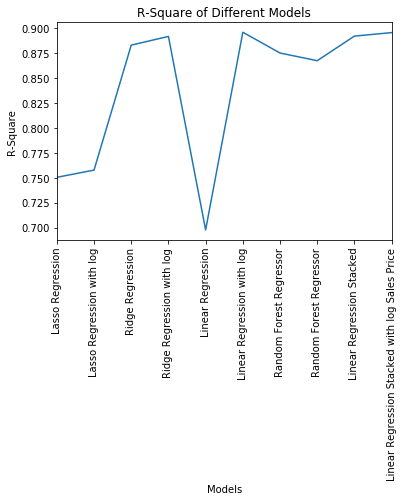

In [31]:
evaluation["R-Square"].plot()
plt.xticks(rotation=90)
plt.ylabel("R-Square")
plt.title("R-Square of Different Models")

Text(0.5, 1.0, 'Mean Absolute Percentage Error for different models')

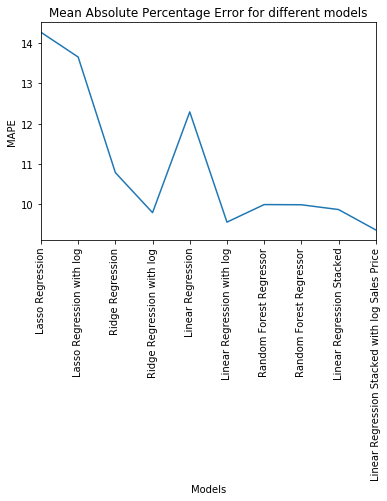

In [32]:
evaluation["MAPE"].plot()
plt.xticks(rotation=90)
plt.ylabel("MAPE")
plt.title("Mean Absolute Percentage Error for different models")

Text(0.5, 1.0, 'Root Mean Squared Error of Different Models')

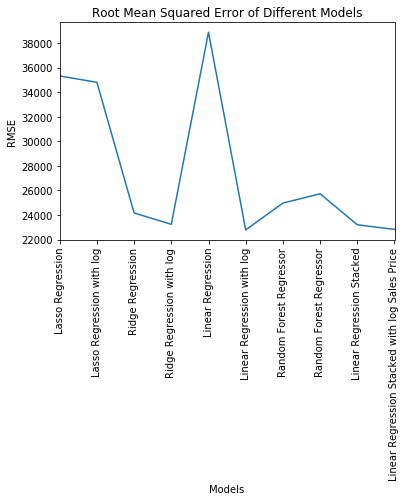

In [33]:
evaluation["RMSE"].plot()
plt.xticks(rotation=90)
plt.ylabel("RMSE")
plt.title("Root Mean Squared Error of Different Models")